## <center> Microsoft Volatility Analysis Project
### <center>presented by Brian Zamkotowicz for Springboard Capstone Project

### <center>  Part 4 - Machine Learning Notebook

The goal of this final notebook will be to apply advanced machine learning techniques to the Microsoft stock and option dataset to build a predictive model of historical volatility.  By first dissecting information about seasonality and trend, I hope to uncover patterns that will make it possible to make useful predictions about the stocks future volatility.

I will use techniques such as ARIMA (Auto-Regressive Integrated Moving Average Models) to examine Microsoft stock's historical volatility as a time series.  I will also incorporate auto ARIMA as a methodology for parameter tuning in the model.  Additionally I believe it will be useful to examine a more a complex model that incorporates features other than just the 10 day Historical Volatility ('Hv10').  Once these models have been generated it will be interesting to compare the models and see which solution was the most appropriate.  It will also be inetersting to see to what extent the historical volatility can be successfully predicted.

In [1]:
#import packages for project

import plotly
from pyramid.arima import auto_arima
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
import quandl
import plotly.plotly as ply
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from datetime import datetime
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

C:\Conda\lib\site-packages\pyramid\__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



In [2]:
#unpack pickled data from previous Data Wrangling Notebook

MSFT_data = pd.read_pickle('C://Users/Home Office/MSFTdata.pickle')

In [3]:
MSFT_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,...,IvMean360,IvMeanSkew360,IvCall720,IvPut720,IvMean720,IvMeanSkew720,IvCall1080,IvPut1080,IvMean1080,IvMeanSkew1080
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-29,85.63,86.0500,85.500,85.54,18162779.0,0.0,1.0,85.63,86.0500,85.500,...,0.2134,0.0096,0.1901,0.2472,0.2186,-0.0015,0.1899,0.2478,0.2188,-0.0024
2017-12-28,85.90,85.9300,85.550,85.72,9872795.0,0.0,1.0,85.90,85.9300,85.550,...,0.2094,0.0096,0.1927,0.2499,0.2213,0.0080,0.1926,0.2516,0.2221,0.0079
2017-12-27,85.65,85.9800,85.215,85.71,13000828.0,0.0,1.0,85.65,85.9800,85.215,...,0.2096,0.0082,0.1973,0.2510,0.2242,-0.0005,0.1974,0.2528,0.2251,-0.0011
2017-12-26,85.31,85.5346,85.030,85.40,9737412.0,0.0,1.0,85.31,85.5346,85.030,...,0.2076,0.0115,0.2010,0.2511,0.2260,0.0156,0.2013,0.2538,0.2276,0.0160
2017-12-22,85.40,85.6300,84.920,85.51,14033977.0,0.0,1.0,85.40,85.6300,84.920,...,0.2064,0.0140,0.1920,0.2493,0.2206,-0.0039,0.1912,0.2526,0.2219,-0.0059


In [4]:
# reset index to change order of data based on issue discovered in previous notebook

MSFT1 = MSFT_data.sort_index(ascending = True)
MSFT1 = MSFT1.reset_index()
MSFT1 = MSFT1.set_index('Date')

In [258]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('Hv10 ~ IvMean10', MSFT1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hv10   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     93.21
Date:                Wed, 15 May 2019   Prob (F-statistic):           2.54e-21
Time:                        10:52:39   Log-Likelihood:                 972.07
No. Observations:                1258   AIC:                            -1940.
Df Residuals:                    1256   BIC:                            -1930.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1034      0.010     10.434      0.0

In [259]:
MSFT1['Adj_Volume'] = MSFT1['Adj. Volume']

In [260]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols


m = ols('Hv10 ~ IvMean10 + IvMean20 + IvMean30 + Phv10 + Adj_Volume + IvMeanSkew10 + Hv20', MSFT1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hv10   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     404.6
Date:                Wed, 15 May 2019   Prob (F-statistic):          7.16e-316
Time:                        10:52:41   Log-Likelihood:                 1671.4
No. Observations:                1258   AIC:                            -3327.
Df Residuals:                    1250   BIC:                            -3286.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0452      0.009     -5.310   

Above is the ols model from the previous notebook based solely on 10 day implied volatility, followed by another model that incorporated several other features.  With additional information about volatility as well as skew and volume, the model performed slightly better as can be seen with the higher R-squared score and the AIC and BIC scores.

In [25]:
#make a new dataframe of solely date and historical volatility

MSFT2 = MSFT1[['Hv10']].copy()
MSFT2.head()

,Hv10
Date,
2013-01-02,0.2701
2013-01-03,0.2781
2013-01-04,0.2885
2013-01-07,0.2858
2013-01-08,0.2847


In [26]:
#split into training and test data

train = MSFT2['2013':'2016']
test = MSFT2 ['2017']

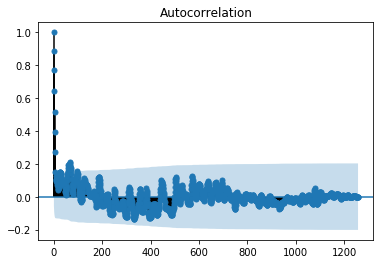

In [263]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(MSFT2)
plt.show()

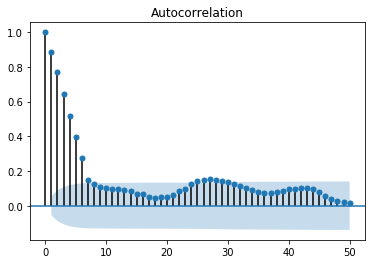

In [264]:
plot_acf(MSFT2, lags = 50)
plt.show()

The above autocorrelation model shows positive correlation for the first few lags.  5 May be a good start for the AR (auto-regressive) parameter in ARIMA.

[]

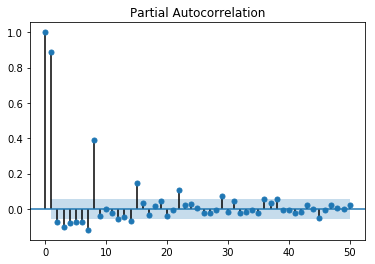

In [265]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(MSFT2, lags = 50)
plt.plot()

The next step would be to fit a model.  I will first attempt using an ARIMA model. The parameters (2,1,2), were pulled from the cell below where those performed the best of the models tested.  In addition to performance statistics of the model, a plot of the residuals is included below, and below that, a distribution plot of those residuals.

C:\Conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                 D.Hv10   No. Observations:                 1007
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1452.461
Method:                       css-mle   S.D. of innovations              0.057
Date:                Wed, 15 May 2019   AIC                          -2892.922
Time:                        10:53:04   BIC                          -2863.434
Sample:                             1   HQIC                         -2881.718
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0002      0.002     -0.092      0.927      -0.004       0.004
ar.L1.D.Hv10    -1.6248      0.033    -49.502      0.000      -1.689      -1.560
ar.L2.D.Hv10    -0.7750      0.036    -21.81

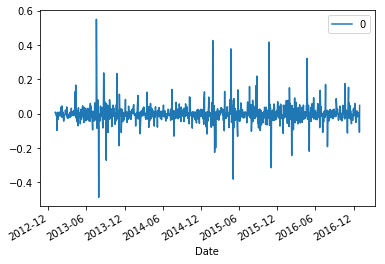

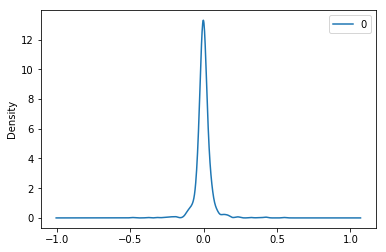

                 0
count  1007.000000
mean     -0.000011
std       0.057206
min      -0.486726
25%      -0.018152
50%      -0.001612
75%       0.016096
max       0.550530


In [266]:
# fit model
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [113]:
arima1 = ARIMA(train, order=(0,1,0))
arima1_fit = arima1.fit()

arima2 = ARIMA(train, order=(2,1,2))
arima2_fit = arima2.fit()

arima3 = ARIMA(train, order=(1,1,0))
arima3_fit = arima3.fit()

arima4 = ARIMA(train, order=(0,1,1))
arima4_fit = arima4.fit()

print(arima1_fit.summary())
print(arima2_fit.summary())
print(arima3_fit.summary())
print(arima4_fit.summary())

C:\Conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will 

                             ARIMA Model Results                              
Dep. Variable:                 D.Hv10   No. Observations:                 1007
Model:                 ARIMA(0, 1, 0)   Log Likelihood                1423.581
Method:                           css   S.D. of innovations              0.059
Date:                Thu, 09 May 2019   AIC                          -2843.162
Time:                        12:48:52   BIC                          -2833.333
Sample:                             1   HQIC                         -2839.428
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.107      0.915      -0.004       0.003
                             ARIMA Model Results                              
Dep. Variable:                 D.Hv10   No. Observat

The test above shows that the second model (2,1,2) ARIMA is currently the best with an AIC score of -2892.  The next step is to vary p and q by plus or minus 1.  These were plugged back in to the ARIMA model above.

The next exploration was an auto-ARIMA model, which essentially grid searches for correct parameters to build the best model.  It also includes seasonality and trend into its analysis.

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.117 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.170 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.323 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.124 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.196 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.347 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.281 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

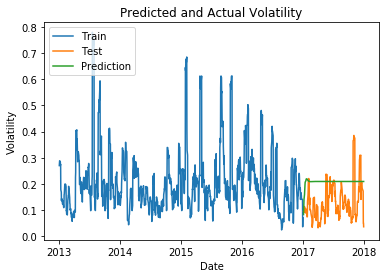

In [267]:
#building the model
from pyramid.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

AAforecast = model.predict(n_periods=len(test))
AAforecast = pd.DataFrame(AAforecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(AAforecast, label='Prediction')
plt.title('Predicted and Actual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc = 'upper left')
plt.show()

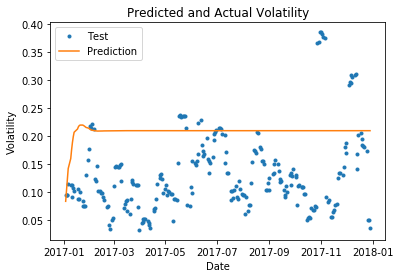

In [268]:
plt.plot(test, label='Test',linestyle = 'None', marker = '.')
plt.plot(AAforecast, label='Prediction')
plt.title('Predicted and Actual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc = 'upper left')
plt.show()

As can be seen in the above plot, the auto-ARIMA just drew a line through the majority of the test period.  I would consider this attempt unsuccessful.

In [269]:
train1 = MSFT1['2013':'2016']
test1 = MSFT1 ['2017']

Text(0.5,1,'Auto Arima Model')

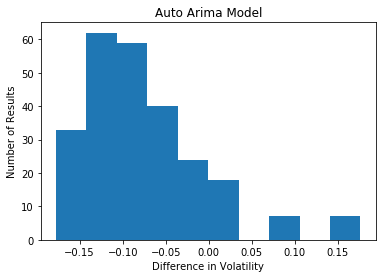

In [271]:
abc =  test['Hv10']- AAforecast['Prediction']
plt.hist(abc)
plt.xlabel("Difference in Volatility")
plt.ylabel("Number of Results")
plt.title('Auto Arima Model')

The above histogram demonstrates that the model over-predicts volatility in the vast majority of instances.

In [118]:
#calculate r squared
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse= sqrt(mean_squared_error(test,AAforecast))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(test,AAforecast)))
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(abc, [5,95]))

RMSE = 
 0.10322495666340771
R squared = 
 -1.1433114158517883
Upper and Lower Bounds for 90% Density:  
 [-0.1590045  0.0838155]


Tha statistics above indicate a significant mean squared error.  What is even more alarming is the negative R-squared score, which indicates the model performed worse than simply taking the mean of the test set and drawing a straight line.

In [245]:
print(test.mean())
print(train.mean())

Hv10    0.132538
dtype: float64
Hv10    0.209476
dtype: float64


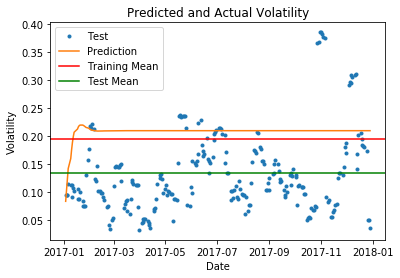

In [274]:
plt.plot(test['Hv10'], label='Test',linestyle = 'None', marker = '.')
plt.plot(AAforecast, label='Prediction')
plt.axhline(0.194, color="red", label = 'Training Mean')
plt.axhline(0.133, color="green", label = 'Test Mean')
plt.title('Predicted and Actual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc = 'upper left')
plt.show()

The next attempt will utilize Facebook's Prophet package.  This model requires a bit of data transformation to get the data frame in the correct format.

In [27]:
from fbprophet import Prophet
# Read train and test

daily_train = train.resample('B').sum()

daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Hv10
daily_train = daily_train.drop(['Hv10'], axis =1)

In [28]:
daily_train = daily_train.reset_index()
daily_train = daily_train.drop(['Date'], axis =1)


The data has been transformed into a form that can be used with Prophet, facebook's technology that claims to work better than ARIMA.

In [276]:
Pmodel = Prophet() #instantiate Prophet
Pmodel.fit(daily_train); #fit the model with your dataframe

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Conda\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [277]:
future_data = Pmodel.make_future_dataframe(periods= len(test), freq = 'b')

In [278]:
forecast_data = Pmodel.predict(future_data)

In [279]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1288,2017-12-11,0.097745,-0.045976,0.244206
1289,2017-12-12,0.111842,-0.028314,0.253189
1290,2017-12-13,0.115085,-0.036765,0.247107
1291,2017-12-14,0.112550,-0.028744,0.241873
1292,2017-12-15,0.124481,-0.021491,0.274068


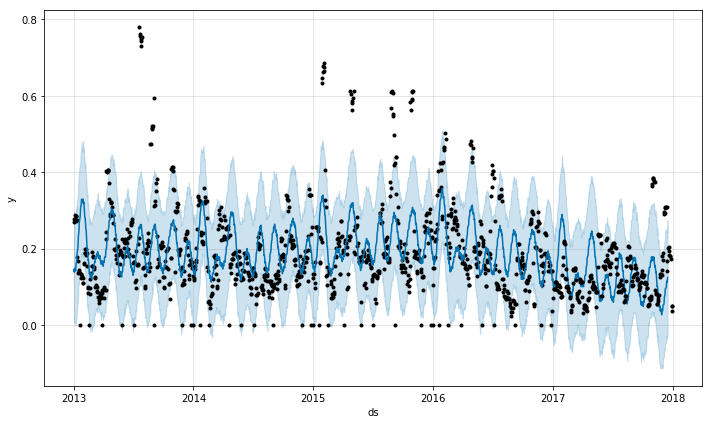

In [280]:

Pmodel.plot(forecast_data)
plt.plot(test, marker = '.', linestyle = 'None', color = 'black')
plt.show()

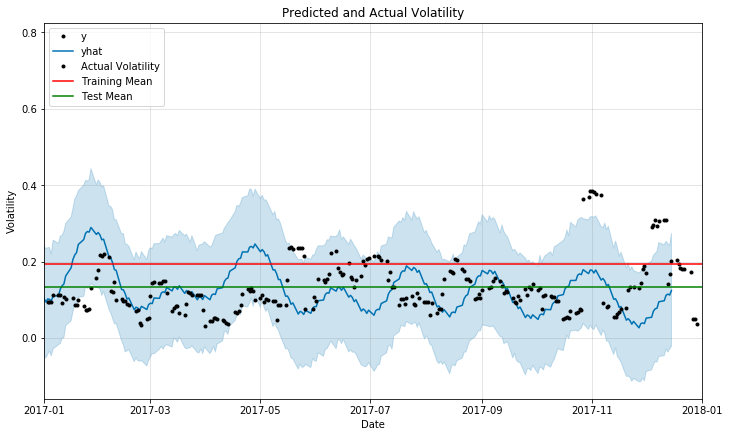

In [283]:
Pmodel.plot(forecast_data)
plt.plot(test, marker = '.', linestyle = 'None', color = 'black', label ='Actual Volatility')
plt.xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
plt.axhline(0.194, color="red", label = 'Training Mean')
plt.axhline(0.133, color="green", label = 'Test Mean')
plt.title('Predicted and Actual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc = 'upper left')
plt.show()

At first glance this model definitely appears fit better and capture some of the movement in volatility.  The next step is to explore the rmse and  r squared for this model.

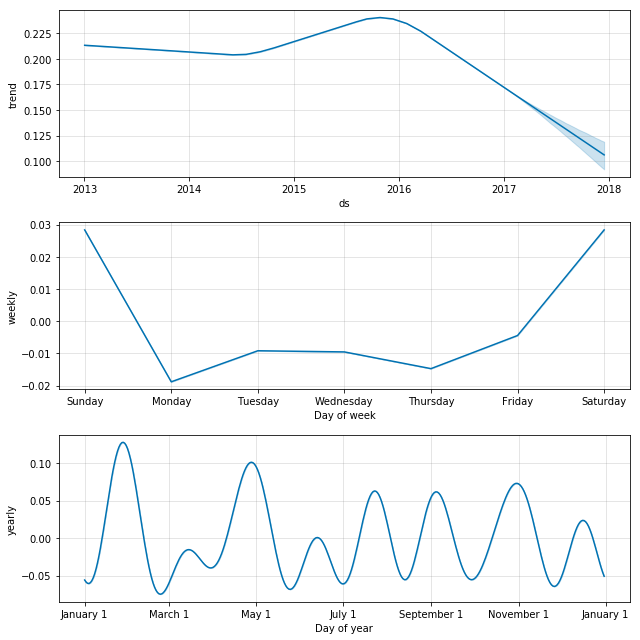

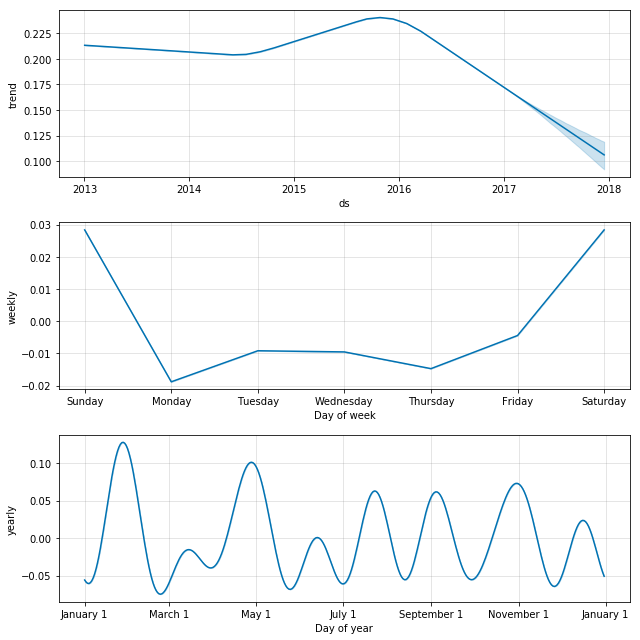

In [144]:
model.plot_components(forecast_data)

In [148]:
diff =  test['Hv10']- fc2017['yhat']
test.head()

,Hv10
Date,
2017-01-03,0.0943
2017-01-04,0.0936
2017-01-05,0.0937
2017-01-06,0.1138
2017-01-09,0.1122


Text(0.5,1,'Prophet Model')

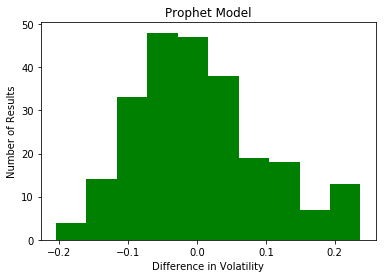

In [149]:
diff =  test['Hv10']- fc2017['yhat']
diff = diff.dropna()
plt.hist(diff, color = 'green')
plt.xlabel("Difference in Volatility")
plt.ylabel("Number of Results")
plt.title('Prophet Model')

In [150]:
rmse= sqrt(mean_squared_error(test,fc2017))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(test,fc2017)))
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(diff, [5,95]))

RMSE = 
 0.09665621045585981
R squared = 
 -0.8792103110437623
Upper and Lower Bounds for 90% Density:  
 [-0.12220517  0.19795751]


The figures above give more information about this model.  The distribution of the residuals approaches normal which seems to indicate a better model.  Looking at the metrics the RMSE and r-squared have both improved indicating a better model than the baseline auto-arima.  The R-squared, however, is still negative, indicating that the model is still worse than just using the mean of the data.

In [11]:
FBtrain = MSFT1['2013':'2016'].resample('B').sum()
FBtrain['ds'] = FBtrain.index
FBtrain['y'] = FBtrain.Hv10
FBtrain = FBtrain.drop(['Hv10'], axis =1)
FBtrain = FBtrain.reset_index()
FBtrain = FBtrain.drop(['Date'], axis =1)

FBtrain.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,...,IvCall720,IvPut720,IvMean720,IvMeanSkew720,IvCall1080,IvPut1080,IvMean1080,IvMeanSkew1080,ds,y
0,27.25,27.73,27.1499,27.62,52899300.0,0.0,1.0,23.870367,24.290835,23.782681,...,0.2547,0.2637,0.2592,0.0165,0.2564,0.2659,0.2611,0.0159,2013-01-02,0.2701
1,27.63,27.65,27.1600,27.25,48294400.0,0.0,1.0,24.203238,24.220757,23.791529,...,0.2561,0.2613,0.2587,0.0162,0.2570,0.2638,0.2604,0.0155,2013-01-03,0.2781
2,27.27,27.34,26.7300,26.74,52521100.0,0.0,1.0,23.887886,23.949204,23.414859,...,0.2555,0.2606,0.2580,0.0161,0.2569,0.2622,0.2595,0.0158,2013-01-04,0.2885
3,26.77,26.88,26.6400,26.69,37110400.0,0.0,1.0,23.449898,23.546255,23.336021,...,0.2550,0.2592,0.2571,0.0170,0.2563,0.2606,0.2584,0.0167,2013-01-07,0.2858
4,26.75,26.79,26.4600,26.55,44703100.0,0.0,1.0,23.432378,23.467417,23.178345,...,0.2563,0.2632,0.2597,0.0170,0.2573,0.2654,0.2613,0.0166,2013-01-08,0.2847


The Facebook Prophet model can also use additional features in the build using the add_regressor function.  By including the 10 day implied volatility, I hoped improve the predictive capactity of the model.

In [12]:
FBtrain.index

RangeIndex(start=0, stop=1043, step=1)

In [29]:
#instantiate Prophet model with regressor

m = Prophet() #instantiate Prophet
m.add_regressor('IvMean10')
m.fit(FBtrain); #fit the model with your dataframe

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Conda\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [14]:
# convert data frame to Prophet appropriate format

FBtest = MSFT1['2017'].resample('B').sum()
FBtest['ds'] = FBtest.index
FBtest['y'] = FBtest.Hv10
FBtest = FBtest.drop(['Hv10'], axis =1)
FBtest = FBtest.reset_index()
FBtest = FBtest.drop(['Date'], axis =1)

FBtest.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,...,IvCall720,IvPut720,IvMean720,IvMeanSkew720,IvCall1080,IvPut1080,IvMean1080,IvMeanSkew1080,ds,y
0,62.79,62.84,62.125,62.58,20694101.0,0.0,1.0,61.424575,61.473488,60.774036,...,0.2489,0.2453,0.2471,0.0263,0.2494,0.2459,0.2476,0.0257,2017-01-03,0.0943
1,62.48,62.75,62.120,62.30,21339969.0,0.0,1.0,61.121316,61.385445,60.769145,...,0.2469,0.2506,0.2488,0.0242,0.2478,0.2511,0.2494,0.0238,2017-01-04,0.0936
2,62.19,62.66,62.030,62.30,24875968.0,0.0,1.0,60.837623,61.297402,60.681102,...,0.2434,0.2469,0.2452,0.0243,0.2442,0.2475,0.2458,0.0238,2017-01-05,0.0937
3,62.30,63.15,62.040,62.84,19922919.0,0.0,1.0,60.945231,61.776747,60.690885,...,0.2432,0.2457,0.2444,0.0249,0.2441,0.2462,0.2452,0.0246,2017-01-06,0.1138
4,62.76,63.08,62.540,62.64,20382730.0,0.0,1.0,61.395228,61.708269,61.180012,...,0.2438,0.2453,0.2446,0.0244,0.2446,0.2457,0.2452,0.0240,2017-01-09,0.1122


In [17]:
new_fut = pd.DataFrame(pd.date_range(start = '2017-1-1', end = '2018-1-1',  freq = 'b'), columns = ['ds'])

In [19]:
new_fut['IvMean10'] = FBtest['IvMean10']

In [21]:
new_fut = new_fut.dropna()

In [30]:
data = m.predict(new_fut)

In [324]:
test.tail()

,Hv10
Date,
2017-12-22,0.1807
2017-12-26,0.1726
2017-12-27,0.0502
2017-12-28,0.0503
2017-12-29,0.0359


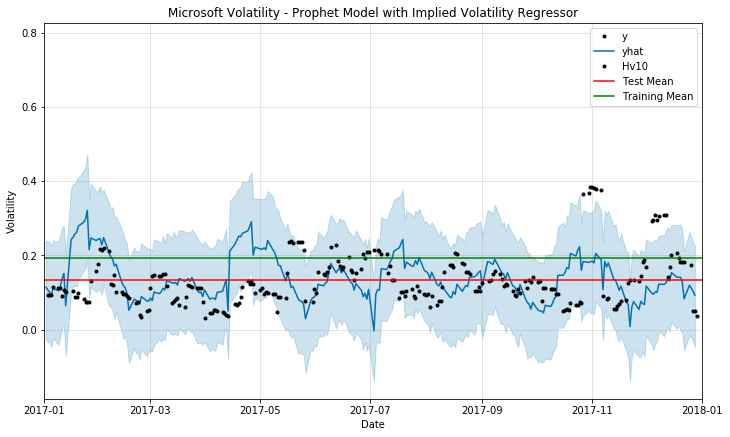

In [334]:
m.plot(data)
plt.plot(test['Hv10'], marker = '.', linestyle = 'None', color = 'black')
plt.axhline(0.132538, color="red", label = 'Test Mean')
plt.xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
plt.title('Microsoft Volatility - Prophet Model with Implied Volatility Regressor')
plt.axhline(0.194, color="green", label = 'Training Mean')
plt.ylabel('Volatility')  
plt.xlabel('Date')
plt.legend(loc = 'upper right')
plt.show()

The prophet model with added implied volatility regressor appears to similar to the previous one, but does seem to capture the direction on some of the volatility spikes.

In [31]:
# merge dat to get matching dates

testds = test
testds['ds'] = testds.index


In [32]:
testds = testds.reset_index()
testds = testds.drop(['Date'], axis =1)

In [33]:
merged = pd.merge(testds, data, how = "inner", on = 'ds')

In [34]:
print(len(testds))
print(len(merged))

250
249


In [35]:
merged.head()

,Hv10,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,IvMean10,IvMean10_lower,IvMean10_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0.0943,2017-01-03,0.188429,-0.032514,0.236363,0.188429,0.188429,-0.023729,-0.023729,-0.023729,...,-0.014587,-0.014587,-0.014587,-0.043010,-0.043010,-0.043010,0.0,0.0,0.0,0.107103
1,0.0936,2017-01-04,0.188334,-0.047639,0.233550,0.188334,0.188334,-0.028488,-0.028488,-0.028488,...,-0.012369,-0.012369,-0.012369,-0.046240,-0.046240,-0.046240,0.0,0.0,0.0,0.101237
2,0.0937,2017-01-05,0.188240,-0.045585,0.229329,0.188240,0.188240,-0.033248,-0.033248,-0.033248,...,-0.015373,-0.015373,-0.015373,-0.048459,-0.048459,-0.048459,0.0,0.0,0.0,0.091160
3,0.1138,2017-01-06,0.188146,-0.024462,0.246682,0.188146,0.188146,-0.028935,-0.028935,-0.028935,...,0.001150,0.001150,0.001150,-0.049588,-0.049588,-0.049588,0.0,0.0,0.0,0.110774
4,0.1122,2017-01-09,0.187863,-0.031930,0.236643,0.187863,0.187863,-0.022192,-0.022192,-0.022192,...,-0.015264,-0.015264,-0.015264,-0.045984,-0.045984,-0.045984,0.0,0.0,0.0,0.104422


In [332]:
rmse= sqrt(mean_squared_error(merged['Hv10'],merged['yhat']))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(merged['Hv10'],merged['yhat'])))
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile((merged['Hv10']-merged['yhat']), [5,95]))

RMSE = 
 0.09144021051810568
R squared = 
 -0.6878678901518245
Upper and Lower Bounds for 90% Density:  
 [-0.14739216  0.18288148]


Looking at the RMSE and R-squared this model has performed the best so far.  While both of those metrics improved, the model still has a negative R-squared value.

Text(0.5,1,'Prophet Model')

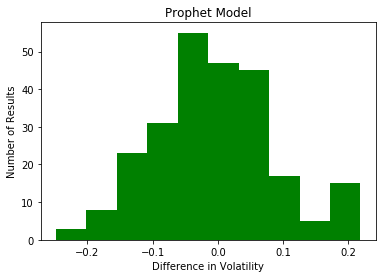

In [36]:
pdiff= merged['Hv10']- merged['yhat']
plt.hist(pdiff, color = 'green')
plt.xlabel("Difference in Volatility")
plt.ylabel("Number of Results")
plt.title('Prophet Model')

In [220]:
#find the start of 2017

MSFT2.iloc[1008:1010]

,Hv10
Date,
2017-01-03,0.0943
2017-01-04,0.0936


I suspect that the largest issue with the previous models is that they are attemopting to predict an entire year of volatility all at once (although the Prophet model does have access to implied volatility at the time of prediction).  Perhaps by predicting one day at a time the accuray will be improved.

In [221]:
#building a new pyramid model that predicts one daya at a time.

from pyramid.arima import auto_arima

    
a = 1008
forecasts = []

while a < 1258:
    model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(MSFT2.iloc[:a])
    forecast = model.predict(n_periods=1)
    forecasts.extend(forecast)
    a += 1
    
forecast2 = pd.DataFrame(forecasts, columns=['Prediction'])    
forecast2.head()



Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=2.409 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.518 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.653 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.658 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.591 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=2.028 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.759 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.225 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.154 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.289 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.170 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.117 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.257 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.266 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.091 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.123 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.338 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.128 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.099 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.218 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.320 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.105 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.164 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.314 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.156 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.118 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.341 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.323 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.142 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.181 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.341 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.189 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.099 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=33.254 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.292 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.164 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.150 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.290 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.163 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.093 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.281 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.311 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.145 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.121 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.298 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.163 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.178 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.480 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.299 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.140 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.153 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.312 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.116 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.106 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.279 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.246 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.139 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.160 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.324 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.118 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.151 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.257 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.285 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.093 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.162 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.325 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.163 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.096 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.207 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.298 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.131 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.151 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.308 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.176 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.085 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.365 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.273 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.089 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.121 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.339 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.118 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.096 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.235 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.228 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.089 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.116 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.318 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.161 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.128 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.274 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.281 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.137 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.147 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.328 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.175 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.107 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.230 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.266 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.139 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.157 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.284 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.166 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.161 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.279 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.336 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.099 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.136 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.292 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.151 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.146 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.309 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.285 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.133 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.151 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.307 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.114 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.088 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.333 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.303 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.122 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.157 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.330 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.150 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.160 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.317 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.283 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.132 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.135 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.327 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.172 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.172 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.238 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.280 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.125 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.163 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.299 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.147 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.153 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.204 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.266 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.162 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.178 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.299 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.162 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.112 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.260 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.290 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.141 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.145 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.318 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.153 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.184 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.267 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.318 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.150 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.149 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.294 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.172 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.139 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.248 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.304 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.115 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.156 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.314 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.121 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.103 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.245 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.269 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.140 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.142 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.299 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.128 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.095 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.266 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.302 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.140 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.170 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.319 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.116 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.082 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.269 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.278 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.136 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.124 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.304 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.171 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.122 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.419 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.283 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.135 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.138 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.321 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.170 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.125 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.300 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.259 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.148 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.147 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.298 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.171 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.122 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.220 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.251 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.145 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.166 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.265 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.165 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.120 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.255 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.288 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.098 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.128 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.299 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.116 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.135 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.250 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.285 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.150 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.138 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.328 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.182 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.106 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.333 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.273 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.136 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.124 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.336 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.196 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.155 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.250 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.243 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.135 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.156 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.348 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.217 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.104 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.276 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.308 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.100 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.135 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.296 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.175 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.106 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.279 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.323 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.131 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.158 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.303 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.157 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.113 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.288 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.301 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

,Prediction
0,0.082931
1,0.112616
2,0.114696
3,0.114264
4,0.132547


In [222]:
from math import sqrt
rmse= sqrt(mean_squared_error(test['Hv10'],forecast2['Prediction']))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(test['Hv10'],forecast2['Prediction'])))
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile((testds['Hv10']-forecast2['Prediction']), [5,95]))

RMSE = 
 0.03745468779179092
R squared = 
 0.7178187055894226
Upper and Lower Bounds for 90% Density:  
 [-0.05251436  0.02803152]


The RMSE has significantly improved, and the R-squared has not only turned positive, but is over .7, meaning that line is a very good fit.

In [224]:
#create new data frame useable for  plotting
newtest = testds
newtest['pred'] = forecast2['Prediction']
newtest.head()

,Hv10,ds,pred
0,0.0943,2017-01-03,0.082931
1,0.0936,2017-01-04,0.112616
2,0.0937,2017-01-05,0.114696
3,0.1138,2017-01-06,0.114264
4,0.1122,2017-01-09,0.132547


In [226]:
#set index to date
newtest = newtest.set_index('ds')
newtest.head()

,Hv10,pred
ds,,
2017-01-03,0.0943,0.082931
2017-01-04,0.0936,0.112616
2017-01-05,0.0937,0.114696
2017-01-06,0.1138,0.114264
2017-01-09,0.1122,0.132547


Text(0.5,1,'Auto Arima Model')

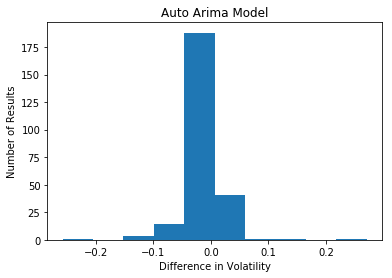

In [229]:
resid =  newtest['Hv10']- newtest['pred']
plt.hist(resid)
plt.xlabel("Difference in Volatility")
plt.ylabel("Number of Results")
plt.title('Auto Arima Model')

The residuals show a tight grouping with very little difference in volatility and no apparent outliers.  It appears the volatility prediction has been extremely accurate.

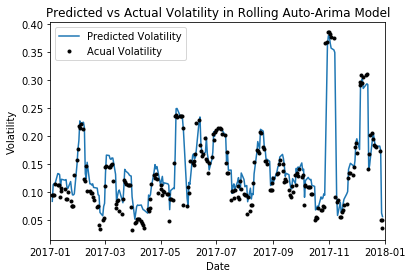

In [227]:
plt.plot(newtest['pred'], label = 'Predicted Volatility')
plt.plot(newtest['Hv10'], marker = '.', linestyle = 'None', color = 'black', label = 'Acual Volatility')
plt.xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
plt.legend(loc = 'upper left')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Predicted vs Actual Volatility in Rolling Auto-Arima Model')
plt.show()

The plot above show that the new rolling auto-ARIMA model has predicted 10 day volatility with, by far the highest degree of accuracy.

Since the original Prophet model was more successful than the baseline auto-ARIMA model, it may be worthwhile to apply the rolling methodology to the Prophet model as well.

In [230]:
from fbprophet import Prophet
# Read train and test

FBtrain = MSFT2

FBtrain['ds'] = FBtrain.index
FBtrain['y'] = FBtrain.Hv10
FBtrain = FBtrain.drop(['Hv10'], axis =1)

In [231]:
FBtrain = FBtrain.reset_index()
FBtrain = FBtrain.drop(['Date'], axis =1)

In [232]:
FBtrain.iloc[1006:1010]

,ds,y
1006,2016-12-29,0.0358
1007,2016-12-30,0.0702
1008,2017-01-03,0.0943
1009,2017-01-04,0.0936


The following loop will make a seperate Prophet model for each day and then record that day in a new data frame.

In [233]:
b = 1008
proph_forecasts = []

while b < 1267:
    proph_model = Prophet()
    proph_model.fit(FBtrain.iloc[:b])
    proph_forecast = proph_model.make_future_dataframe(periods=1, freq = 'b')
    work = proph_model.predict(proph_forecast)
    proph_forecasts.append(work.tail(1))
    b += 1
    


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Conda\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet wi

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [234]:
df2= pd.concat(proph_forecasts)

In [235]:
df2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1008,2017-01-02,0.176931,0.004679,0.264115,0.176931,0.176931,-0.044276,-0.044276,-0.044276,-0.005504,-0.005504,-0.005504,-0.038772,-0.038772,-0.038772,0.0,0.0,0.0,0.132655
1009,2017-01-04,0.174108,-0.012351,0.253333,0.174108,0.174108,-0.054785,-0.054785,-0.054785,-0.014098,-0.014098,-0.014098,-0.040687,-0.040687,-0.040687,0.0,0.0,0.0,0.119323
1010,2017-01-05,0.173643,-0.013986,0.250518,0.173643,0.173643,-0.055931,-0.055931,-0.055931,-0.015617,-0.015617,-0.015617,-0.040314,-0.040314,-0.040314,0.0,0.0,0.0,0.117712
1011,2017-01-06,0.174557,0.002640,0.266089,0.174557,0.174557,-0.041281,-0.041281,-0.041281,-0.002534,-0.002534,-0.002534,-0.038747,-0.038747,-0.038747,0.0,0.0,0.0,0.133276
1012,2017-01-09,0.173590,0.008622,0.273054,0.173590,0.173590,-0.030278,-0.030278,-0.030278,-0.005633,-0.005633,-0.005633,-0.024644,-0.024644,-0.024644,0.0,0.0,0.0,0.143312


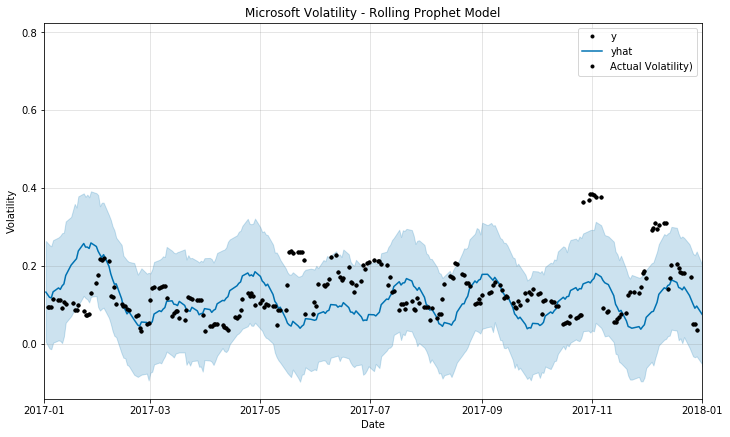

In [336]:
proph_model.plot(df2)
plt.plot(test['Hv10'], marker = '.', linestyle = 'None', color = 'black', label = 'Actual Volatility)' )
plt.xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
plt.title('Microsoft Volatility - Rolling Prophet Model')
plt.ylabel('Volatility')  
plt.xlabel('Date')
plt.legend(loc = 'upper right')
plt.show()

The data must be merged to get a comparable set of days.

In [239]:
Ptest = test
Ptest['ds'] = Ptest.index

Ptest = Ptest.reset_index()
Ptest = Ptest.drop(['Date'], axis =1)

merge1 = pd.merge(Ptest, df2, how = "inner", on = 'ds')


In [240]:
rmse= sqrt(mean_squared_error(merge1['Hv10'],merge1['yhat']))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(merge1['Hv10'],merge1['yhat'])))
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile((merge1['Hv10']-merge1['yhat']), [5,95]))

RMSE = 
 0.08729256562321407
R squared = 
 -0.5007594514690585
Upper and Lower Bounds for 90% Density:  
 [-0.08275382  0.19061666]


Unfortunately this model is not an improvement on the previous one.  Judging by the shape of it, there is more focus on seasonality than on the previous day's data, so while this model is an improvement on some of the earlier ones.  It falls short of the most recent ARIMA model.

Looking back at the previous auto-ARIMa model it seems to be leaps and bounds above everything else. I suspected that perhaps there might be an issue since the improvement was really exceptional.  After looking closely at what the model was doing I found an issue.  The model is predicting 10 day volatility, but since the a new model is built each day, it has access to 9 of the 10 days included in that calcualation.  Even if the model just took an average of those 9 days as the forecast, it would be highly effective.  While extremely accurate, this is not particularly useful.  I rebuilt the model, this time predicting 10 days at a time, and looking only at the accuracy of the 10 day out prediction.

In [288]:
MSFT2.head()

,Hv10
Date,
2013-01-02,0.2701
2013-01-03,0.2781
2013-01-04,0.2885
2013-01-07,0.2858
2013-01-08,0.2847


In [289]:
MSFT3 = MSFT2
MSFT3.head()

,Hv10
Date,
2013-01-02,0.2701
2013-01-03,0.2781
2013-01-04,0.2885
2013-01-07,0.2858
2013-01-08,0.2847


In [298]:
#building a new pyramid model that predicts one daya at a time.

from pyramid.arima import auto_arima

    
c = 1008
forecasts10 = []

while c < 1258:
    model10 = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
    model10.fit(MSFT3.iloc[:c])
    forecast10 = model10.predict(n_periods=10)
    forecasts10.append(forecast10[9])
    c += 1
    
day10 = pd.DataFrame(forecasts10, columns=['Prediction'])    
day10.head()


Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.131 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.143 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.317 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.183 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.246 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.286 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.273 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.125 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.174 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.376 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.194 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.235 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.391 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.265 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.137 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.129 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.315 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.176 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.152 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.260 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.300 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.099 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.136 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.339 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.152 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.192 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.318 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.322 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.171 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.156 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.339 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.152 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.184 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.332 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.318 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.155 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.148 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.398 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.202 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.165 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.364 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.331 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.163 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.144 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.366 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.181 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.190 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.357 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.320 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.128 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.151 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.337 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.187 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.219 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.396 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.307 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.173 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.166 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.336 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.197 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.202 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.442 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.298 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.132 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.148 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.312 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.193 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.198 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.382 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.305 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.106 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.175 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.342 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.164 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.199 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.372 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.311 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.169 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.190 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.323 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.151 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.317 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.304 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.331 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.097 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.148 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.314 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.117 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.140 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.244 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.310 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.089 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.157 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.317 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.126 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.188 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.247 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.264 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.132 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.209 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.322 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.148 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.162 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.265 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.290 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.136 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.148 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.322 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.180 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.100 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.273 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.309 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.143 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.142 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.298 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.160 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.114 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.250 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.309 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.143 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.126 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.329 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.188 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.105 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.210 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.305 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.132 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.156 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.279 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.163 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.149 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.289 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.316 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.142 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.129 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.277 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.177 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.179 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.259 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.289 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.128 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.156 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.331 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.162 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.084 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.328 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.310 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.090 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.129 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.315 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.154 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.258 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.244 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.248 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.091 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.291 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.347 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.181 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.159 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.342 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.293 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.142 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.134 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.319 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.121 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.109 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.280 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.317 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.141 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.150 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.295 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.114 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.104 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.280 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.298 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.134 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.166 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.281 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.184 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.153 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.229 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.256 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.138 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.155 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.315 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.127 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.134 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.208 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.248 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.130 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.151 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.342 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.172 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.103 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.295 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.311 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.137 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.159 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.374 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.184 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.088 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.296 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.261 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.140 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.129 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.310 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.190 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.138 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.233 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.318 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.147 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.139 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.282 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.131 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.264 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.305 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.308 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.110 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.129 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.311 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.178 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.182 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.291 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.301 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.126 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.154 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.317 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.160 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.137 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.301 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.316 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.134 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.155 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.287 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.173 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.118 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.278 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.294 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.090 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.127 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.336 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.158 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.140 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.261 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.275 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-1414.975, BIC=-1405.144, Fit time=0.146 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2905.531, BIC=-2890.784, Fit time=0.162 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2170.917, BIC=-2156.170, Fit time=0.297 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2909.199, BIC=-2889.536, Fit time=0.162 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.823, BIC=-2900.328, Fit time=1.144 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=-2929.375, BIC=-2894.965, Fit time=1.268 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=-2918.559, BIC=-2893.980, Fit time=0.274 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0

,Prediction
0,0.212218
1,0.217131
2,0.216925
3,0.216335
4,0.217739


In [301]:
rolling = test
rolling = rolling.reset_index()
rolling['Pred'] = day10['Prediction']
rolling = rolling.set_index('Date')

In [302]:
rolling.head()

,Hv10,Pred
Date,,
2017-01-03,0.0943,0.212218
2017-01-04,0.0936,0.217131
2017-01-05,0.0937,0.216925
2017-01-06,0.1138,0.216335
2017-01-09,0.1122,0.217739


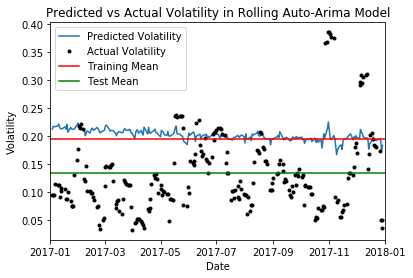

In [304]:

plt.plot(rolling['Pred'], label = 'Predicted Volatility')
plt.plot(rolling['Hv10'], marker = '.', linestyle = 'None', color = 'black', label = 'Actual Volatility')
plt.xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
plt.axhline(0.194, color="red", label = 'Training Mean')
plt.axhline(0.133, color="green", label = 'Test Mean')
plt.legend(loc = 'upper left')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Predicted vs Actual Volatility in Rolling Auto-Arima Model')
plt.show()

In [305]:
rmse= sqrt(mean_squared_error(rolling['Hv10'],rolling['Pred']))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(rolling['Hv10'],rolling['Pred'])))
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile((rolling['Hv10']-rolling['Pred']), [5,95]))

RMSE = 
 0.09840109400628724
R squared = 
 -0.9476715139109109
Upper and Lower Bounds for 90% Density:  
 [-0.15359577  0.08745068]


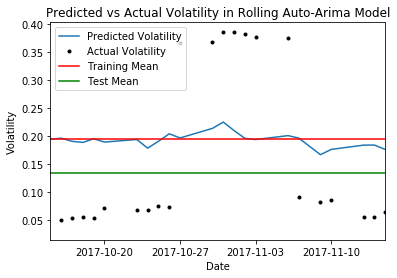

In [312]:

plt.plot(rolling['Pred'], label = 'Predicted Volatility')
plt.plot(rolling['Hv10'], marker = '.', linestyle = 'None', color = 'black', label = 'Actual Volatility')
plt.xlim([datetime(2017, 10, 15), datetime(2017, 11, 15)])
plt.axhline(0.194, color="red", label = 'Training Mean')
plt.axhline(0.133, color="green", label = 'Test Mean')
plt.legend(loc = 'upper left')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Predicted vs Actual Volatility in Rolling Auto-Arima Model')
plt.show()

Shifting the rolling window on the auto-ARIMA model provides slightly disappointing results in terms of the metrics.  The RMSE and R-squared numbers are an improvement on the original baseline ARIMA model but fall short of any of the other models.  On the positive side, The diagram above shows an example where this model makes several predictions that move in the correct direction and outperform the mean in the short term.  It is my belief that if volatility were predicted on a shorter term (less than a ten day average), this model might be significantly more effective.

Overall, the results of modeling 10 day volatility in Microsoft stock were somewhat mixed.  By implementing different types of models, adding regressors, and moving to a rolling forecast I was able to make significant improvements from the baseline model.  On the downside, I was unable to produce a model that predicted the historical volatility with greater accuracy than the mean of the training set without "cheating" by overfitting to some of the days that were already included in the prediction set.

In [346]:
late_rolling = rolling['2017-10-01':]
late_rolling.head()

,Hv10,Pred
Date,,
2017-10-02,0.1268,0.197815
2017-10-03,0.1298,0.193473
2017-10-04,0.0764,0.195184
2017-10-05,0.1108,0.186647
2017-10-06,0.1121,0.191888


In [349]:
rmse= sqrt(mean_squared_error(late_rolling['Hv10'],late_rolling['Pred']))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(late_rolling['Hv10'],late_rolling['Pred'])))
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile((late_rolling['Hv10']-late_rolling['Pred']), [5,95]))

RMSE = 
 0.1068034372476268
R squared = 
 0.003581542728177456
Upper and Lower Bounds for 90% Density:  
 [-0.14204219  0.174955  ]
